# Import all libraries

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd


# Visual Inspection

In [54]:
path = 'Train_Data'
filenames_A = [filen for filen in os.listdir(f"{path}/A/") if 'jpg' in filen]
filenames_B = [filen for filen in os.listdir(f"{path}/B/") if 'jpg' in filen]
filenames_C = [filen for filen in os.listdir(f"{path}/C/") if 'jpg' in filen]
filenames_D = [filen for filen in os.listdir(f"{path}/D/") if 'jpg' in filen]
filenames_S = [filen for filen in os.listdir(f"{path}/S/") if 'jpg' in filen]

print(len(filenames_A)+len(filenames_B)+len(filenames_C)+len(filenames_D)+len(filenames_S))
print(len(filenames_A),len(filenames_B),len(filenames_C),len(filenames_D),len(filenames_S))

2516
299 362 731 914 210


Text(0.5, 0.98, 'Class A or 1')

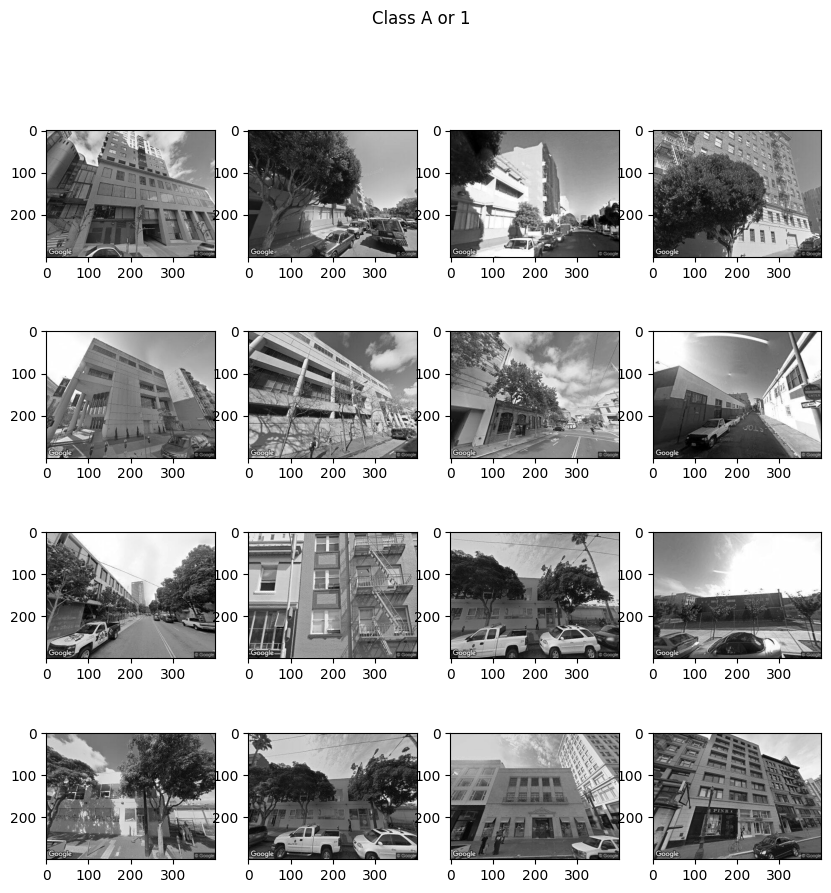

In [3]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize = (10,10))

ax = ax.ravel()

for i in range(16):
    img = np.asarray((Image.open(f'{path}/A/{filenames_A[i]}'))) # Open the image -> Convert to numpy array
    ax[i].imshow(img, cmap='grey')
fig.suptitle('Class A or 1')

Text(0.5, 0.98, 'Class B or 2')

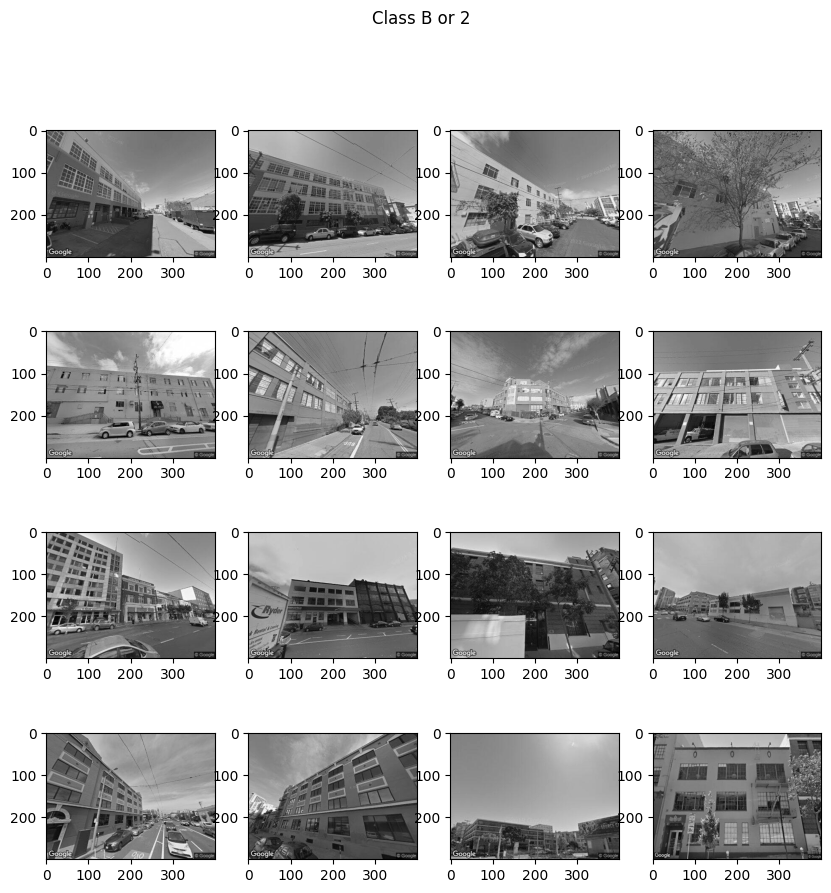

In [4]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize = (10,10))

ax = ax.ravel()

for i in range(16):
    img = np.asarray((Image.open(f'{path}/B/{filenames_B[i]}')))
    ax[i].imshow(img, cmap='grey')
fig.suptitle('Class B or 2')

Text(0.5, 0.98, 'Class C or 3')

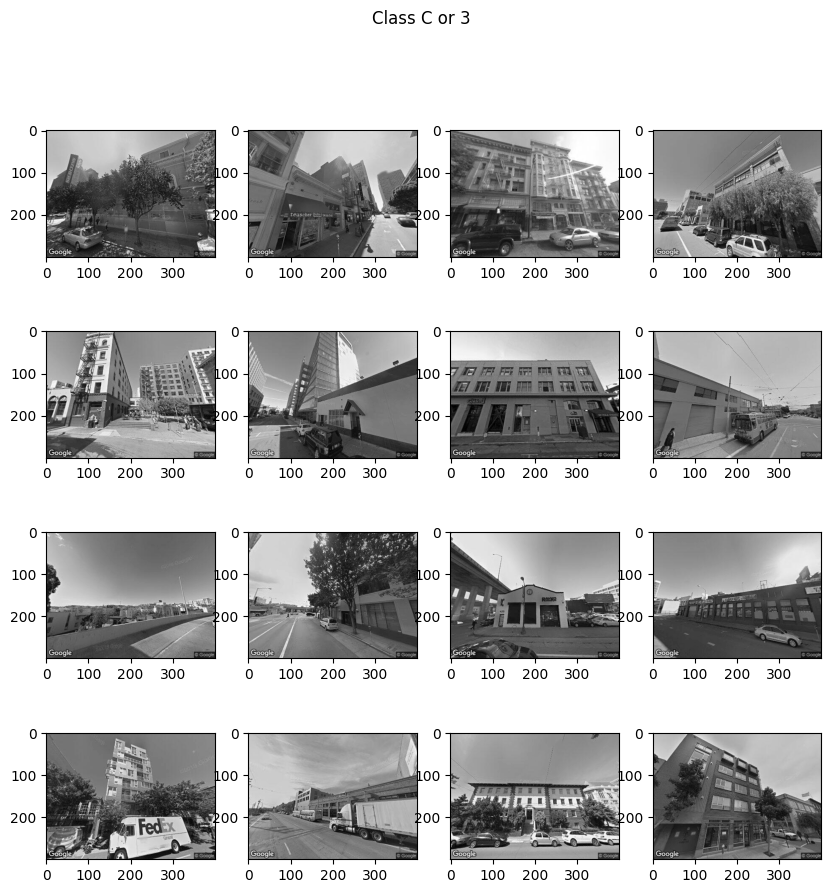

In [5]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize = (10,10))

ax = ax.ravel()

for i in range(16):
    img = np.asarray((Image.open(f'{path}/C/{filenames_C[i]}')))
    ax[i].imshow(img, cmap='grey')
fig.suptitle('Class C or 3')

Text(0.5, 0.98, 'Class D or 4')

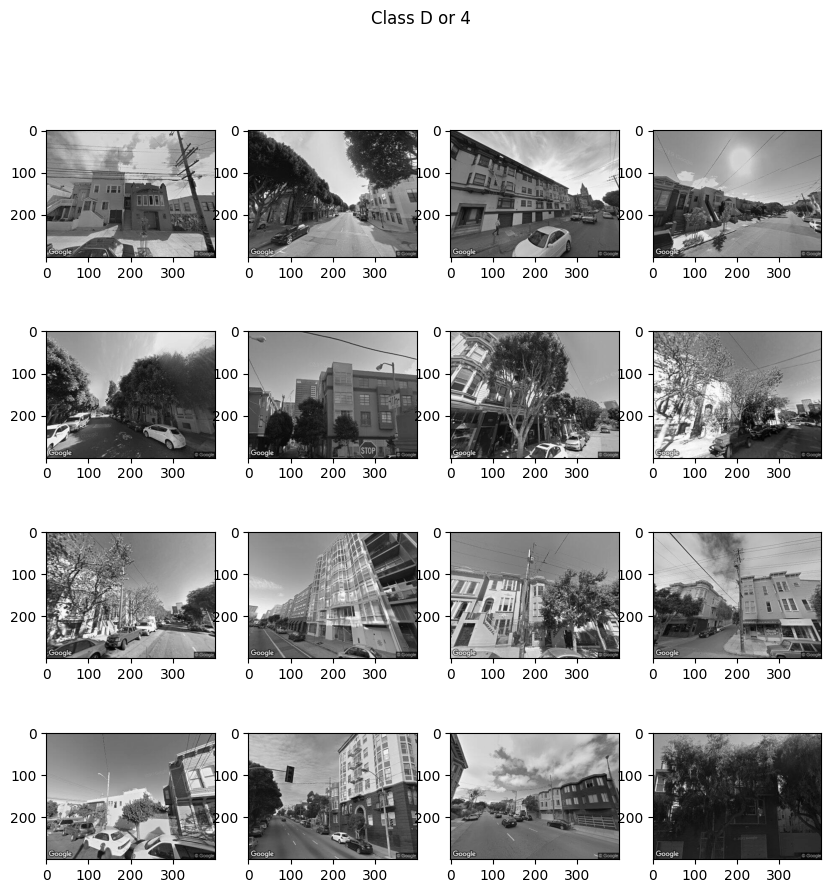

In [6]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize = (10,10))

ax = ax.ravel()

for i in range(16):
    img = np.asarray((Image.open(f'{path}/D/{filenames_D[i]}')))
    ax[i].imshow(img, cmap='grey')
fig.suptitle('Class D or 4')

Text(0.5, 0.98, 'Class S or 5')

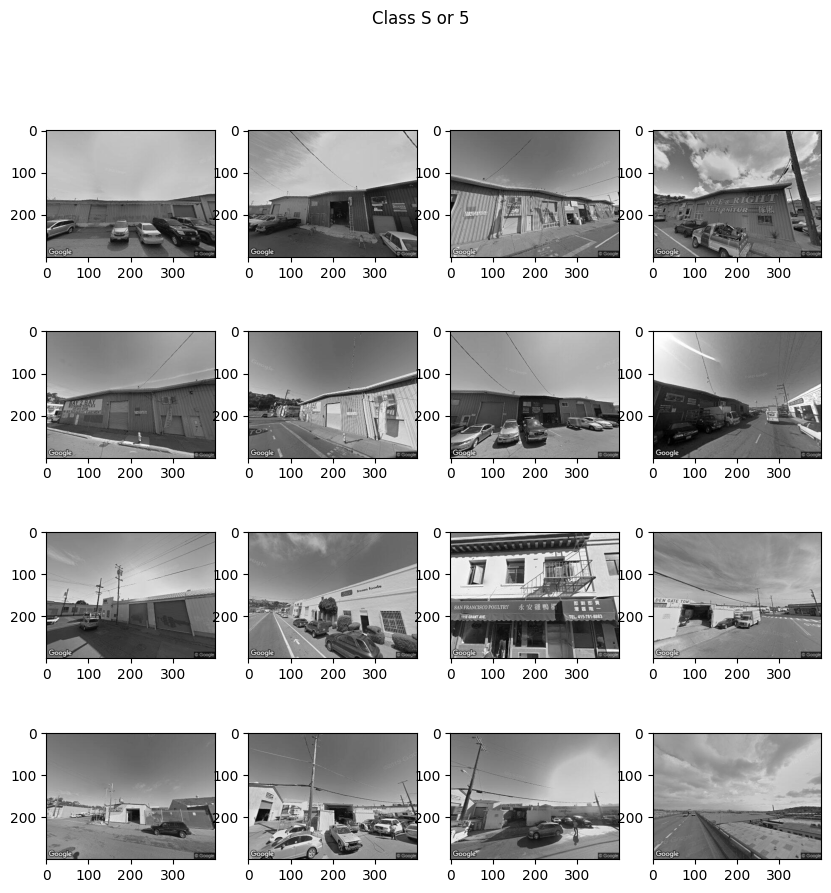

In [7]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize = (10,10))

ax = ax.ravel()

for i in range(16):
    img = np.asarray((Image.open(f'{path}/S/{filenames_S[i]}')))
    ax[i].imshow(img, cmap='grey')
fig.suptitle('Class S or 5')

# Data preprocessing for training | Create Image arrays for later(eg: Train_ResNET.py)

In [55]:
path = 'Train_Data'
np.asarray((Image.open(f'{path}/B/{filenames_B[12]}'))).shape # Shape check

(300, 400)

### Deleting noisy and clearly miscategorized images(1st order)

Removed manually
In the training dataset images that are confusing at best and non-infrormative have been removed, such as:
1) Contains no buildings.
2) Dark and too noisy
3) Obviously miscategorized:
     (i)Masonry violating (no soft story or large openings in bottom part, present of decorative patterns)
     (ii)Steel with panel buildings, violating (more than 2 floors)
     (iii)Occluded by trees or vehicles.

In [56]:
# Storing the names of images to be excluded as a list
del_images = [filen for filen in os.listdir(f"Delete_Images") if 'jpg' in filen]
print(len(del_images))


114


In [58]:
Dataset_clean = False # Toggle this to set whether to delete the image or not


box = (0, 0, 400, 280)
# Resize and store relevant images



def store_img_return_arr(filenames_list,path_to,class_name):

    store_names = np.zeros((len(filenames_list),224,224)) # num_of_files x 224 x 224, initialization
    
    for i,fname in enumerate(filenames_list): # Loop through all files in that folder--> store as np array
        store_names[i,:,:] = np.asarray((Image.open(f'{path_to}/{class_name}/{fname}').crop(box).resize((224, 224))))
    return store_names


# Only keep images not in del_images
path = 'Train_Data'
if(Dataset_clean == True):
    filenames_A = [filen for filen in os.listdir(f"{path}/A/") if (('jpg' in filen)and ((filen in del_images)==False))]
    filenames_B = [filen for filen in os.listdir(f"{path}/B/") if (('jpg' in filen)and ((filen in del_images)==False))]
    filenames_C = [filen for filen in os.listdir(f"{path}/C/") if (('jpg' in filen)and ((filen in del_images)==False))]
    filenames_D = [filen for filen in os.listdir(f"{path}/D/") if (('jpg' in filen)and ((filen in del_images)==False))]
    filenames_S = [filen for filen in os.listdir(f"{path}/S/") if (('jpg' in filen)and ((filen in del_images)==False))]
else:
    filenames_A = [filen for filen in os.listdir(f"{path}/A/") if ('jpg' in filen)]
    filenames_B = [filen for filen in os.listdir(f"{path}/B/") if ('jpg' in filen)]
    filenames_C = [filen for filen in os.listdir(f"{path}/C/") if ('jpg' in filen)]
    filenames_D = [filen for filen in os.listdir(f"{path}/D/") if ('jpg' in filen)]
    filenames_S = [filen for filen in os.listdir(f"{path}/S/") if ('jpg' in filen)]



store_A = store_img_return_arr(filenames_A, path, 'A')
store_B = store_img_return_arr(filenames_B, path, 'B')
store_C = store_img_return_arr(filenames_C, path, 'C')
store_D = store_img_return_arr(filenames_D, path, 'D')
store_S = store_img_return_arr(filenames_S, path, 'S')

# Concat the 5 arrays along the rows to get the entire training dataset

image_array = np.concatenate((store_A,store_B,store_C,store_D,store_S), axis=0)
print(image_array.shape)

print(len(filenames_A)+len(filenames_B)+len(filenames_C)+len(filenames_D)+len(filenames_S))
# The first dimension length must match with the 2nd print statement/just a check


label_array = np.ones(len(filenames_A)+len(filenames_B)+len(filenames_C)+len(filenames_D)+len(filenames_S))
length_list = [0,len(filenames_A),len(filenames_B),len(filenames_C),len(filenames_D),len(filenames_S)] 
# we used val@i:val@i+1 hence 0 is inserted
offset = 0
for i in range(0,5): # i = 0 -> 4
    offset = offset + length_list[i]
    label_array[offset:offset+length_list[i+1]] = label_array[offset:offset+length_list[i+1]] * (i+1)
    # The array already stores 1 s, just multply with the class number
    # offset variable is used in order to move forward, the current class length should be added to insert values sequentially


values, counts = np.unique(label_array, return_counts=True)
print(values)
print(counts)

# This should match with

print(len(filenames_A), len(filenames_B), len(filenames_C), len(filenames_D), len(filenames_S))

(2516, 224, 224)
2516
[1. 2. 3. 4. 5.]
[299 362 731 914 210]
299 362 731 914 210


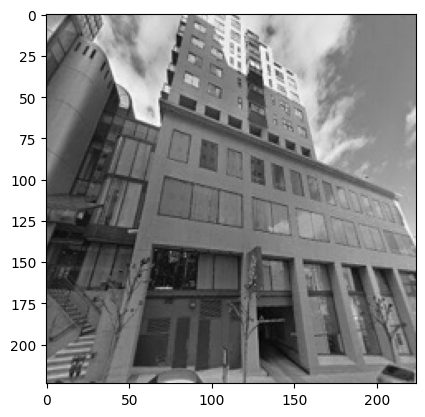

In [60]:
plt.imshow(image_array[0,:,:],cmap = 'gray')

In [59]:
# Saved as array for later use
np.save(f'Image_array224x224_Cleaned{Dataset_clean}.npy', image_array.astype('uint8'))
np.save(f'label_array224x224__Cleaned{Dataset_clean}.npy', label_array.astype('uint8'))

# Trying classical models with filters: XGBoost and SVM | Canny and Sobel

In [147]:
# Load the arrays from memory
image_array = np.load('Image_array224x224.npy')
image_labels = np.load('label_array224x224.npy')

# image_array = np.load('Image_array224x224_compressed.npz')['arr_0'].astype(np.uint8)
# image_labels = np.load('label_array.npy')
target = image_labels.astype(int)-1

## Directly

In [148]:

img_array_in = image_array.reshape((image_array.shape[0],-1))

X_train, X_val, y_train, y_val = train_test_split(img_array_in, 
                                                target, 
                                                test_size=0.2, stratify=target,
                                                random_state=42)

Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
Mean cross-validation accuracy: 0.4047522522522523


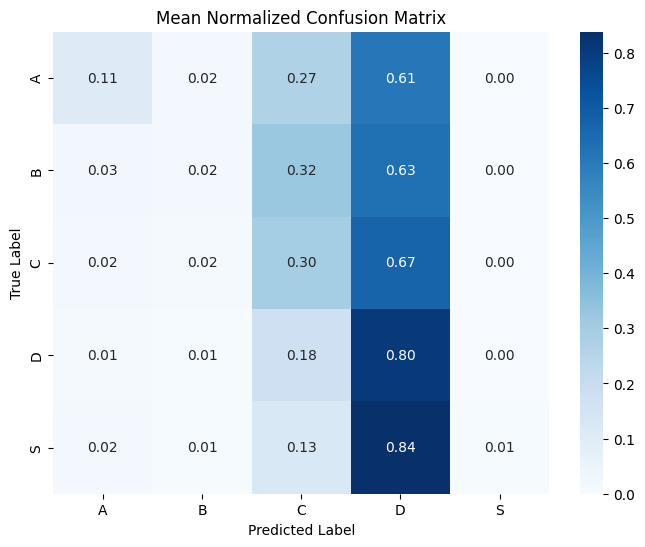

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store confusion matrices for each fold
conf_matrices = np.zeros((len(class_names), len(class_names)))
accuracies = []
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(img_array_in, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = img_array_in[train_idx], img_array_in[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create and train the XGBoost classifier
    xgb = XGBClassifier(
        n_estimators=500, 
        max_depth=1, 
        eval_metric='mlogloss', 
        tree_method="hist", 
        device="cuda", 
        early_stopping_rounds=10
    )
    
    xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Predict on the validation set
    y_val_pred = xgb.predict(X_val)
    
    # Compute the confusion matrix for this fold
    cm = confusion_matrix(y_val, y_val_pred, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrices += cm
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrices / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean cross-validation accuracy: {mean_accuracy}")

# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#Build the model
svm = SVC(kernel="linear", gamma="auto", C=2.0, verbose=True)
# Trained the model
svm.fit(X_train, y_train)

print(accuracy_score(svm.predict(X_val),y_val))
# plt.show()


[LibSVM]....*..*
optimization finished, #iter = 3611
obj = -0.000006, rho = 0.427341
nSV = 470, nBSV = 0
....*..*
optimization finished, #iter = 5241
obj = -0.000009, rho = 0.518352
nSV = 639, nBSV = 0
....*..*
optimization finished, #iter = 6366
obj = -0.000010, rho = 0.358327
nSV = 706, nBSV = 0
...*..*
optimization finished, #iter = 1856
obj = -0.000003, rho = -1.775683
nSV = 279, nBSV = 0
.....*...*
optimization finished, #iter = 6845
obj = -0.000013, rho = 0.364413
nSV = 756, nBSV = 0
......*..*
optimization finished, #iter = 8334
obj = -0.000015, rho = -0.082482
nSV = 812, nBSV = 0
...*..*
optimization finished, #iter = 2151
obj = -0.000004, rho = -2.364306
nSV = 319, nBSV = 0
.........*....*
optimization finished, #iter = 13700
obj = -0.000026, rho = -0.454886
nSV = 1165, nBSV = 0
...*..*
optimization finished, #iter = 3484
obj = -0.000006, rho = -2.194576
nSV = 464, nBSV = 0
....*.*
optimization finished, #iter = 4945
obj = -0.000008, rho = -2.154544
nSV = 546, nBSV = 0
Total n

## Canny edge detection

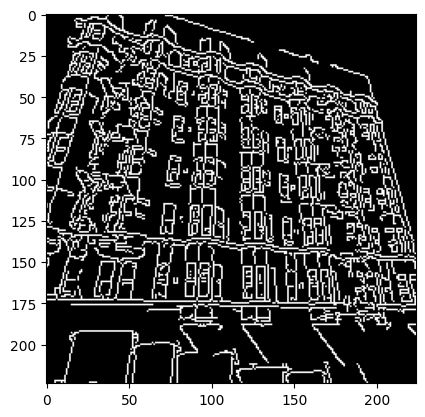

In [237]:
import cv2 

def canny_edge_detection(frame): 
	# Convert the frame to grayscale for edge detection 
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
	
	# Apply Gaussian blur to reduce noise and smoothen edges 
	blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5) 
	
	# Perform Canny edge detection 
	edges = cv2.Canny(blurred, 70, 135) 
	
	return blurred, edges

edges = cv2.Canny(image_array[1000, :, :].astype(np.uint8), threshold1=200, threshold2=100)
plt.imshow(edges, cmap='gray')
plt.show()

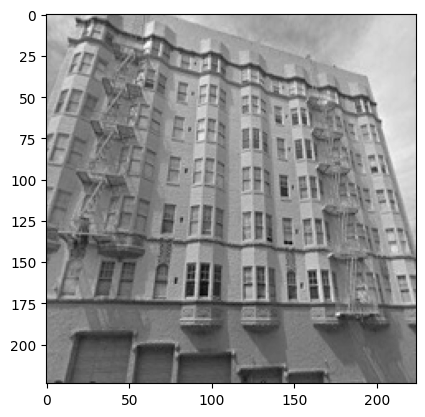

In [236]:
plt.imshow(image_array[1000, :, :].astype(np.uint8), cmap='gray')

In [ ]:
image_array_canny = image_array.copy()

for i in range(image_array.shape[0]):
    edges = cv2.Canny(image_array[i, :, :].astype(np.uint8), threshold1=100, threshold2=100)
    image_array_canny[i,:,:] = edges

img_array_in = image_array_canny.reshape((image_array.shape[0],-1)) 


X_train, X_val, y_train, y_val = train_test_split(img_array_in, 
                                                target, 
                                                test_size=0.2, stratify=target,
                                                random_state=42)

Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
Mean cross-validation accuracy: 0.4118199930699931


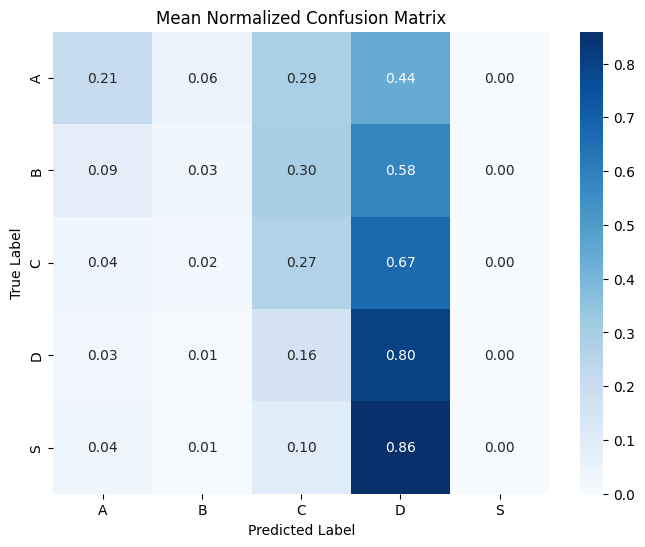

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store confusion matrices for each fold
conf_matrices = np.zeros((len(class_names), len(class_names)))
accuracies = []
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(img_array_in, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = img_array_in[train_idx], img_array_in[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create and train the XGBoost classifier
    xgb = XGBClassifier(
        n_estimators=500, 
        max_depth=1, 
        eval_metric='mlogloss', 
        tree_method="hist", 
        device="cuda", 
        early_stopping_rounds=10
    )
    
    xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Predict on the validation set
    y_val_pred = xgb.predict(X_val)
    
    # Compute the confusion matrix for this fold
    cm = confusion_matrix(y_val, y_val_pred, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrices += cm
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrices / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean cross-validation accuracy: {mean_accuracy}")

# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#Build the model
svm = SVC(kernel="linear", gamma="auto", C=2.0, verbose=True)
# Trained the model
svm.fit(X_train, y_train)

print(accuracy_score(svm.predict(X_val),y_val))
# plt.show()


[LibSVM].*
optimization finished, #iter = 940
obj = -0.000001, rho = 0.607697
nSV = 503, nBSV = 0
.*
optimization finished, #iter = 1454
obj = -0.000001, rho = 0.761309
nSV = 775, nBSV = 0
.*
optimization finished, #iter = 1563
obj = -0.000001, rho = 0.858651
nSV = 857, nBSV = 0
*.*
optimization finished, #iter = 467
obj = -0.000000, rho = 1.005012
nSV = 264, nBSV = 0
.*
optimization finished, #iter = 1656
obj = -0.000001, rho = 0.184208
nSV = 850, nBSV = 0
.*
optimization finished, #iter = 1837
obj = -0.000001, rho = 0.342354
nSV = 978, nBSV = 0
.*
optimization finished, #iter = 573
obj = -0.000000, rho = 0.567979
nSV = 322, nBSV = 0
.*.*
optimization finished, #iter = 2490
obj = -0.000002, rho = 0.198390
nSV = 1288, nBSV = 0
*.*
optimization finished, #iter = 878
obj = -0.000001, rho = 0.341790
nSV = 484, nBSV = 0
*.*
optimization finished, #iter = 1039
obj = -0.000001, rho = 0.288143
nSV = 584, nBSV = 0
Total nSV = 1913
0.4178794178794179


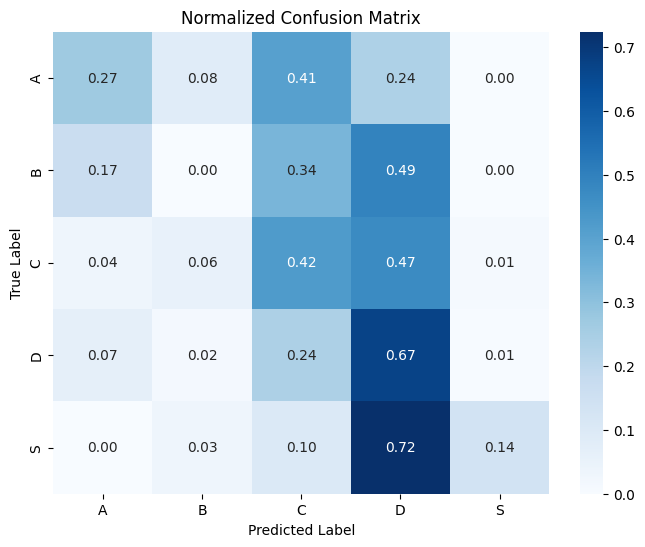

In [11]:
# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Step 1: Make predictions on the validation set
y_val_pred = svm.predict(X_val)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Step 3: Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 4: Visualize the confusion matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [17]:
np.save('Image_array_224x224_canny.npy', image_array_canny.astype('int16'))

## Sobel edge detection

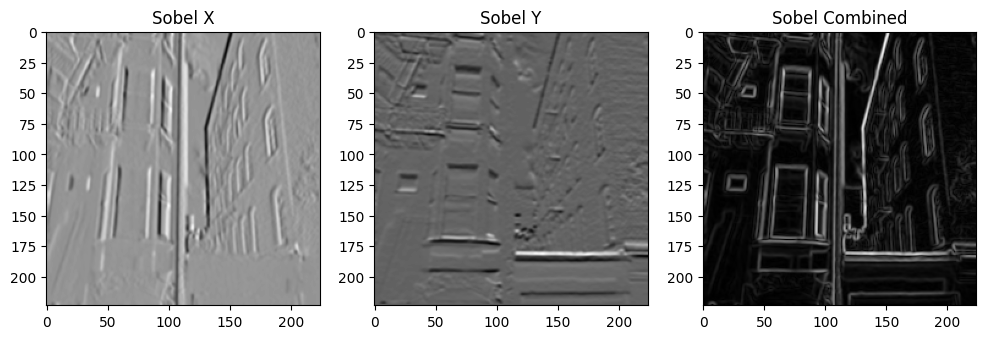

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Sobel edge detection
def sobel_edge_detection(frame):
    # Since the image is already grayscale, no need for color conversion
    gray = frame  # Directly use the grayscale image
    
    # Apply Gaussian blur to reduce noise and smoothen edges
    blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5)

    # Sobel edge detection in the x and y directions
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)  # X direction
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)  # Y direction
    
    # Compute the magnitude of the gradient
    sobel_combined = cv2.magnitude(sobelx, sobely)
    
    return sobelx, sobely, sobel_combined

# Applying Sobel edge detection to a specific grayscale image
sobelx, sobely, sobel_combined = sobel_edge_detection(image_array[20, :, :].astype(np.uint8))

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.title('Sobel X')
plt.imshow(sobelx, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel Y')
plt.imshow(sobely, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Combined')
plt.imshow(sobel_combined, cmap='gray')

plt.show()


In [48]:
image_array_sobel = image_array.copy()

for i in range(image_array.shape[0]):
    _, _, sobel_combined = sobel_edge_detection(image_array[i, :, :].astype(np.uint8))
    image_array_sobel[i,:,:] = sobel_combined

img_array_in = image_array_sobel.reshape((image_array.shape[0],-1)) 


X_train, X_val, y_train, y_val = train_test_split(img_array_in, 
                                                target, 
                                                test_size=0.2, stratify=target,
                                                random_state=42)

Training fold 1...
Training fold 2...
Training fold 3...
Training fold 4...
Training fold 5...
Mean cross-validation accuracy: 0.3627295564795565


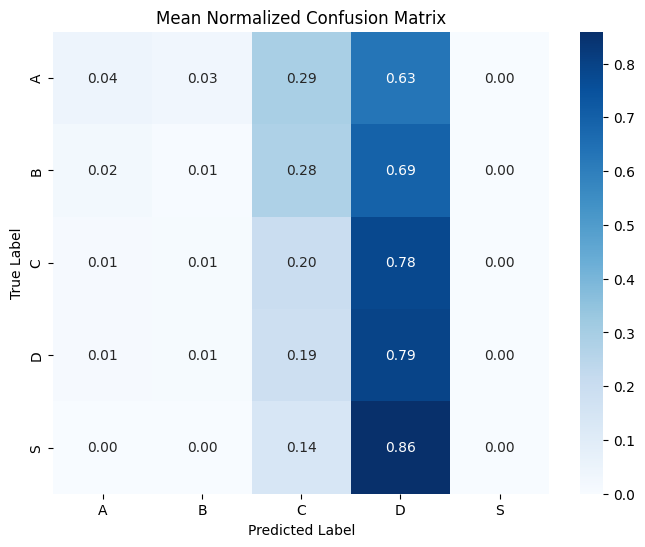

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store confusion matrices for each fold
conf_matrices = np.zeros((len(class_names), len(class_names)))
accuracies = []
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(img_array_in, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = img_array_in[train_idx], img_array_in[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create and train the XGBoost classifier
    xgb = XGBClassifier(
        n_estimators=500, 
        max_depth=1, 
        eval_metric='mlogloss', 
        tree_method="hist", 
        device="cuda", 
        early_stopping_rounds=10
    )
    
    xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Predict on the validation set
    y_val_pred = xgb.predict(X_val)
    
    # Compute the confusion matrix for this fold
    cm = confusion_matrix(y_val, y_val_pred, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrices += cm
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrices / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean cross-validation accuracy: {mean_accuracy}")

# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#Build the model
svm = SVC(kernel="linear", gamma="auto", C=2.0, verbose=True)
# Trained the model
svm.fit(X_train, y_train)

print(accuracy_score(svm.predict(X_val),y_val))
# plt.show()

[LibSVM].*
optimization finished, #iter = 885
obj = -0.000001, rho = 1.298767
nSV = 513, nBSV = 0
.*
optimization finished, #iter = 1484
obj = -0.000001, rho = 1.237265
nSV = 773, nBSV = 0
.*
optimization finished, #iter = 1636
obj = -0.000001, rho = 0.642455
nSV = 868, nBSV = 0
.*
optimization finished, #iter = 641
obj = -0.000001, rho = 3.534610
nSV = 338, nBSV = 0
.*
optimization finished, #iter = 1679
obj = -0.000002, rho = -0.067829
nSV = 853, nBSV = 0
.*
optimization finished, #iter = 1908
obj = -0.000002, rho = -0.720588
nSV = 996, nBSV = 0
.*
optimization finished, #iter = 759
obj = -0.000001, rho = 2.471097
nSV = 398, nBSV = 0
.*.*
optimization finished, #iter = 2390
obj = -0.000003, rho = -0.896659
nSV = 1290, nBSV = 0
.*
optimization finished, #iter = 1130
obj = -0.000001, rho = 2.304878
nSV = 657, nBSV = 0
.*
optimization finished, #iter = 1341
obj = -0.000001, rho = 2.477977
nSV = 768, nBSV = 0
Total nSV = 1921
0.3770833333333333


In [22]:
np.save('Image_array_224x224_sobel.npy', image_array_sobel.astype('int16'))

# Use pretrained CNN with XGBoost or SVM as prefinal layer(XGBoost, SVM)

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image

# Load the dataset
# Load the arrays from memory
image_array = np.load('Image_array224x224.npy')
image_array_sobel = np.load('Image_array_224x224_sobel.npy')
image_array_canny = np.load('Image_array_224x224_canny.npy')
image_labels = np.load('label_array224x224.npy')

pseudo_rgb_1 = np.stack((image_array, image_array_sobel, image_array_canny), axis=-1)

blurred_image = cv2.GaussianBlur(image_array, (5, 5), 0)
sharpened_image = cv2.filter2D(image_array, -1, np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]]))

# Stack the grayscale, blurred, and sharpened images
pseudo_rgb_2 = np.stack([image_array, blurred_image, sharpened_image], axis=-1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

target = image_labels.astype(int)-1

# Check the shape to ensure it's now in the form of (num_images, 224, 224, 3)
print(pseudo_rgb_1.shape)

(2404, 224, 224, 3)


In [62]:

# Preprocessing parameters
batch_size = 64
num_classes = 5  # For 5 classes

# Data Augmentation and Normalization for images
transform = transforms.Compose([
    # transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel RGB
    transforms.Resize((224, 224)),  # Resize images for ResNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

class BuildingDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx].astype(np.uint8)
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label


## Pseudo-rgb 1 stack[normal_image, sobel, canny]

### Convo-XGB

Training fold 1...
Fold 1 Validation Accuracy: 45.11%
Training fold 2...
Fold 2 Validation Accuracy: 44.28%
Training fold 3...
Fold 3 Validation Accuracy: 43.45%
Training fold 4...
Fold 4 Validation Accuracy: 45.32%
Training fold 5...
Fold 5 Validation Accuracy: 46.88%
Mean Validation Accuracy: 45.01%


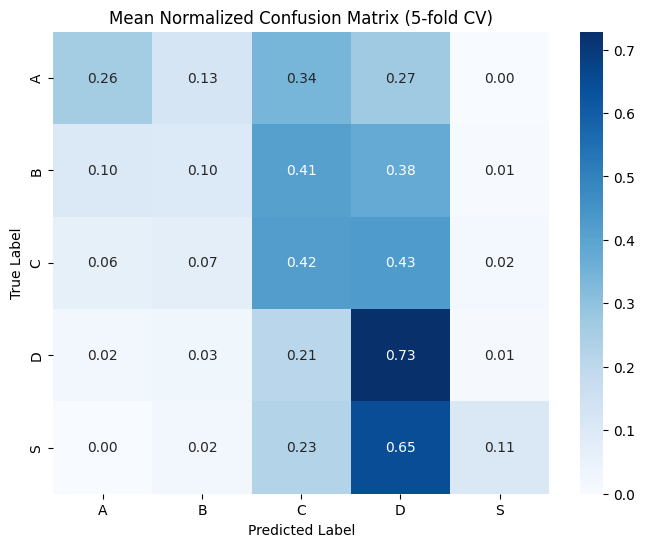

In [139]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize confusion matrix accumulator
conf_matrix_sum = np.zeros((len(class_names), len(class_names)))

# Initialize a list to store accuracy for each fold
accuracies = []

resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Remove the final fully connected layer
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).to(device)
resnet_model.eval()  # Set to evaluation mode
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(pseudo_rgb_1, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = pseudo_rgb_1[train_idx], pseudo_rgb_1[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create datasets and loaders for this fold
    train_dataset = BuildingDataset(X_train, y_train, transform=transform)
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    def extract_features(model, loader):
        features_list = []
        labels_list = []
        
        with torch.no_grad():
            for images, labels in loader:
                images = images.to(device)
                # Forward pass through ResNet
                features = model(images)
                features = features.view(features.size(0), -1)  # Flatten
                features_list.append(features.cpu().numpy())
                labels_list.append(labels.cpu().numpy())
        
        return np.concatenate(features_list), np.concatenate(labels_list)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    

    # Extract features for the current fold
    train_features, train_labels = extract_features(resnet_model, train_loader)
    val_features, val_labels = extract_features(resnet_model, val_loader)

    # Train XGBoost
    xgb = XGBClassifier(n_estimators=500, max_depth=4, eval_metric='logloss', tree_method="hist", device="cuda", reg_lambda=0.05, random_state=42)
    xgb.fit(train_features, train_labels, verbose=False)

    # Predict on validation set
    val_preds = xgb.predict(val_features)
    val_accuracy = accuracy_score(val_labels, val_preds)
    accuracies.append(val_accuracy)
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%')

    # Compute confusion matrix for this fold
    cm = confusion_matrix(val_labels, val_preds, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrix_sum += cm

# Compute the mean confusion matrix

mean_accuracy = np.mean(accuracies)
print(f'Mean Validation Accuracy: {mean_accuracy * 100:.2f}%')

mean_conf_matrix = conf_matrix_sum / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix (5-fold CV)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the mean validation accuracy across folds


### Convo-SVM

Training fold 1...
Fold 1 Validation Accuracy: 48.23%
Training fold 2...
Fold 2 Validation Accuracy: 46.15%
Training fold 3...
Fold 3 Validation Accuracy: 44.91%
Training fold 4...
Fold 4 Validation Accuracy: 45.32%
Training fold 5...
Fold 5 Validation Accuracy: 47.92%
Mean Validation Accuracy: 46.51%


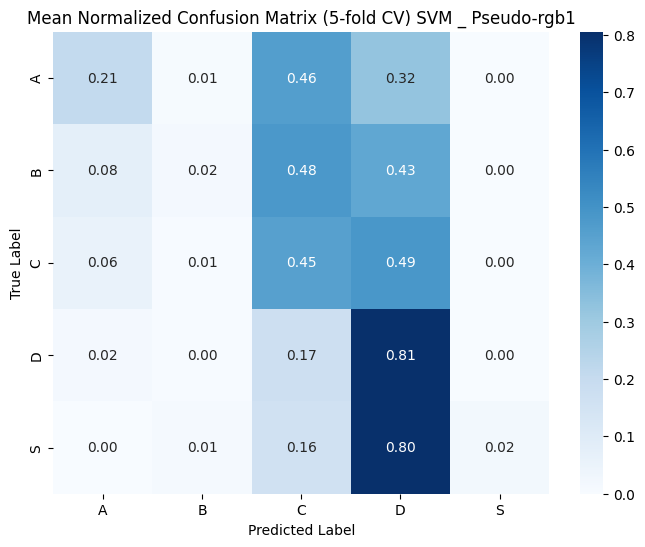

In [140]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Remove the final fully connected layer
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).to(device)
resnet_model.eval()  # Set to evaluation mode
# Initialize confusion matrix accumulator
conf_matrix_sum = np.zeros((len(class_names), len(class_names)))
accuracies = []
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(pseudo_rgb_1, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = pseudo_rgb_1[train_idx], pseudo_rgb_1[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create datasets and loaders for this fold
    train_dataset = BuildingDataset(X_train, y_train, transform=transform)
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Function to extract features using ResNet
    def extract_features(model, loader):
        features_list = []
        labels_list = []
        
        with torch.no_grad():
            for images, labels in loader:
                images = images.to(device)
                # Forward pass through ResNet
                features = model(images)
                features = features.view(features.size(0), -1)  # Flatten
                features_list.append(features.cpu().numpy())
                labels_list.append(labels.cpu().numpy())
        
        return np.concatenate(features_list), np.concatenate(labels_list)

    # Extract features for the current fold
    train_features, train_labels = extract_features(resnet_model, train_loader)
    val_features, val_labels = extract_features(resnet_model, val_loader)

    # Train SVM
    svm = SVC(kernel="rbf", gamma="auto", C=10.0, verbose=False)
    svm.fit(train_features, train_labels)

    # Predict on validation set
    val_preds = svm.predict(val_features)
    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%')
    accuracies.append(val_accuracy)

    # Compute confusion matrix for this fold
    cm = confusion_matrix(val_labels, val_preds, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrix_sum += cm

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrix_sum / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]
mean_accuracy = np.mean(accuracies)
print(f'Mean Validation Accuracy: {mean_accuracy * 100:.2f}%')
# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix (5-fold CV) SVM _ Pseudo-rgb1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Pseudo-rgb 2 | stack[normal_image, gaussian_blur(red), Sharpened]

### Convo-XGB

Training fold 1...
Fold 1 Validation Accuracy: 62.16%
Training fold 2...
Fold 2 Validation Accuracy: 57.59%
Training fold 3...
Fold 3 Validation Accuracy: 58.63%
Training fold 4...
Fold 4 Validation Accuracy: 60.91%
Training fold 5...
Fold 5 Validation Accuracy: 56.67%


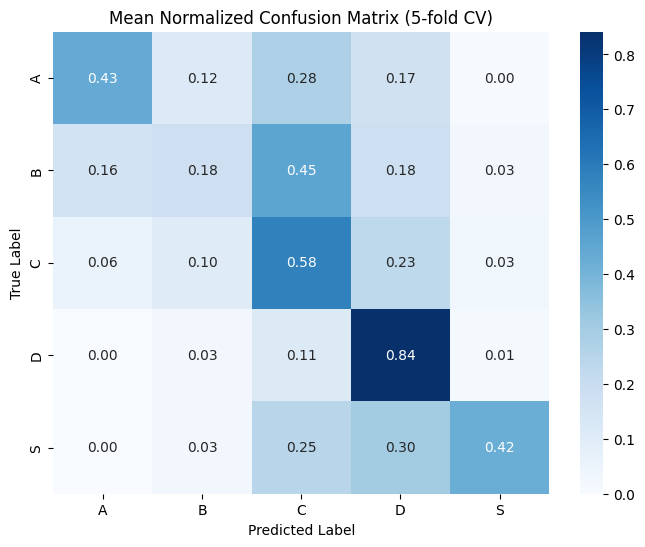

Mean Validation Accuracy: 59.19%


In [141]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Remove the final fully connected layer
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).to(device)
resnet_model.eval()  # Set to evaluation mode
# Initialize confusion matrix accumulator
conf_matrix_sum = np.zeros((len(class_names), len(class_names)))

# Initialize a list to store accuracy for each fold
accuracies = []

# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(pseudo_rgb_1, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = pseudo_rgb_2[train_idx], pseudo_rgb_2[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create datasets and loaders for this fold
    train_dataset = BuildingDataset(X_train, y_train, transform=transform)
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    def extract_features(model, loader):
        features_list = []
        labels_list = []
        
        with torch.no_grad():
            for images, labels in loader:
                images = images.to(device)
                # Forward pass through ResNet
                features = model(images)
                features = features.view(features.size(0), -1)  # Flatten
                features_list.append(features.cpu().numpy())
                labels_list.append(labels.cpu().numpy())
        
        return np.concatenate(features_list), np.concatenate(labels_list)

    # Extract features for the current fold
    train_features, train_labels = extract_features(resnet_model, train_loader)
    val_features, val_labels = extract_features(resnet_model, val_loader)

    # Train XGBoost
    xgb = XGBClassifier(n_estimators=500, max_depth=3, eval_metric='logloss', tree_method="hist", device="cuda", reg_lambda=0.05, random_state=42)
    xgb.fit(train_features, train_labels, verbose=False)

    # Predict on validation set
    val_preds = xgb.predict(val_features)
    val_accuracy = accuracy_score(val_labels, val_preds)
    accuracies.append(val_accuracy)
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%')

    # Compute confusion matrix for this fold
    cm = confusion_matrix(val_labels, val_preds, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrix_sum += cm

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrix_sum / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix (5-fold CV)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the mean validation accuracy across folds
mean_accuracy = np.mean(accuracies)
print(f'Mean Validation Accuracy: {mean_accuracy * 100:.2f}%')


### Convo-SVM

Training fold 1...
Fold 1 Validation Accuracy: 65.90%
Training fold 2...
Fold 2 Validation Accuracy: 62.79%
Training fold 3...
Fold 3 Validation Accuracy: 61.54%
Training fold 4...
Fold 4 Validation Accuracy: 62.99%
Training fold 5...
Fold 5 Validation Accuracy: 61.04%
Mean Validation Accuracy: 62.85%


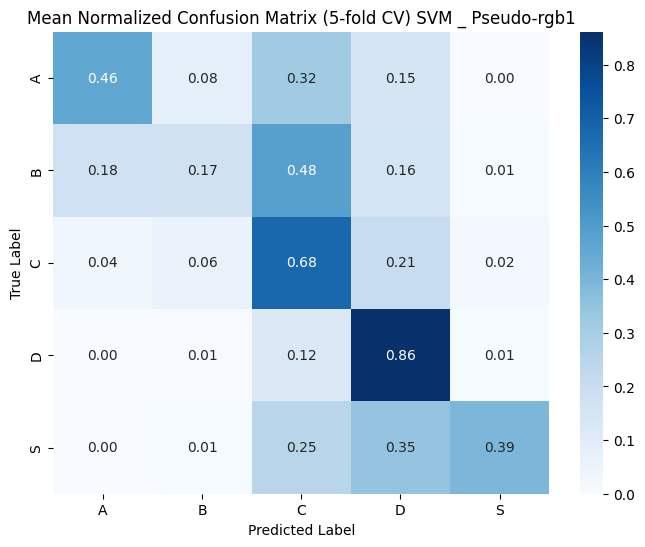

In [146]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
# resnet_model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
# Remove the final fully connected layer
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).to(device)
resnet_model.eval()  # Set to evaluation mode
# Initialize confusion matrix accumulator
conf_matrix_sum = np.zeros((len(class_names), len(class_names)))
accuracies = []
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(pseudo_rgb_1, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = pseudo_rgb_2[train_idx], pseudo_rgb_2[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create datasets and loaders for this fold
    train_dataset = BuildingDataset(X_train, y_train, transform=transform)
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Function to extract features using ResNet
    def extract_features(model, loader):
        features_list = []
        labels_list = []
        
        with torch.no_grad():
            for images, labels in loader:
                images = images.to(device)
                # Forward pass through ResNet
                features = model(images)
                features = features.view(features.size(0), -1)  # Flatten
                features_list.append(features.cpu().numpy())
                labels_list.append(labels.cpu().numpy())
        
        return np.concatenate(features_list), np.concatenate(labels_list)

    # Extract features for the current fold
    train_features, train_labels = extract_features(resnet_model, train_loader)
    val_features, val_labels = extract_features(resnet_model, val_loader)

    # Train SVM
    svm = SVC(kernel="rbf", gamma="auto", C=10.0, verbose=False)
    svm.fit(train_features, train_labels)

    # Predict on validation set
    val_preds = svm.predict(val_features)
    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%')
    accuracies.append(val_accuracy)

    # Compute confusion matrix for this fold
    cm = confusion_matrix(val_labels, val_preds, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrix_sum += cm

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrix_sum / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]
mean_accuracy = np.mean(accuracies)
print(f'Mean Validation Accuracy: {mean_accuracy * 100:.2f}%')
# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Mean Normalized Confusion Matrix (5-fold CV) SVM _ Pseudo-rgb1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Directly using the images: Duplicating into 3 channels

### Convo-XGB

Training fold 1...
Fold 1 Validation Accuracy: 64.24%
Training fold 2...
Fold 2 Validation Accuracy: 59.88%
Training fold 3...
Fold 3 Validation Accuracy: 59.04%
Training fold 4...
Fold 4 Validation Accuracy: 60.50%
Training fold 5...
Fold 5 Validation Accuracy: 60.21%
Mean Validation Accuracy: 60.77%


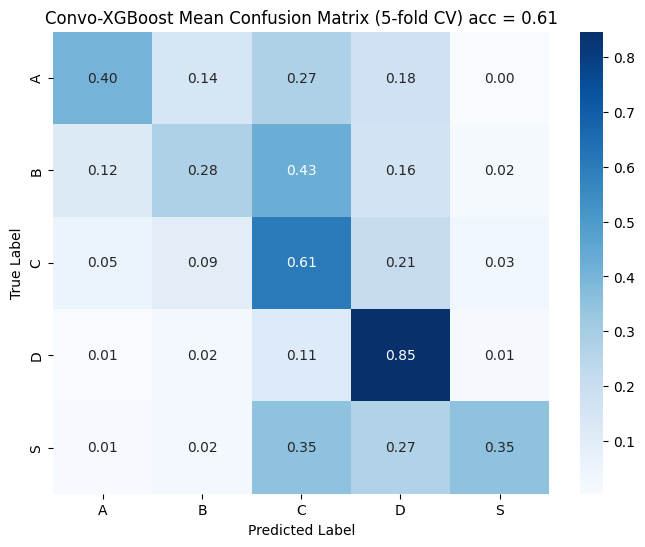

In [143]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize confusion matrix accumulator
conf_matrix_sum = np.zeros((len(class_names), len(class_names)))
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Remove the final fully connected layer
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).to(device)
resnet_model.eval()  # Set to evaluation mode
# Initialize a list to store accuracy for each fold
accuracies = []

# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(pseudo_rgb_1, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = image_array[train_idx], image_array[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create datasets and loaders for this fold
    train_dataset = BuildingDataset(X_train, y_train, transform=transform)
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    def extract_features(model, loader):
        features_list = []
        labels_list = []
        
        with torch.no_grad():
            for images, labels in loader:
                images = images.to(device)
                # Forward pass through ResNet
                features = model(images)
                features = features.view(features.size(0), -1)  # Flatten
                features_list.append(features.cpu().numpy())
                labels_list.append(labels.cpu().numpy())
        
        return np.concatenate(features_list), np.concatenate(labels_list)

    # Extract features for the current fold
    train_features, train_labels = extract_features(resnet_model, train_loader)
    val_features, val_labels = extract_features(resnet_model, val_loader)

    # Train XGBoost
    xgb = XGBClassifier(n_estimators=500, max_depth=3, eval_metric='logloss', tree_method="hist", device="cuda", reg_lambda=0.05, random_state=42)
    xgb.fit(train_features, train_labels, verbose=False)

    # Predict on validation set
    val_preds = xgb.predict(val_features)
    val_accuracy = accuracy_score(val_labels, val_preds)
    accuracies.append(val_accuracy)
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%')

    # Compute confusion matrix for this fold
    cm = confusion_matrix(val_labels, val_preds, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrix_sum += cm

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrix_sum / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]

mean_accuracy = np.mean(accuracies)
print(f'Mean Validation Accuracy: {mean_accuracy * 100:.2f}%')

# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Convo-XGBoost Mean Confusion Matrix (5-fold CV) acc = {mean_accuracy:.2f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the mean validation accuracy across folds



### Convo-SVM

Training fold 1...
(1923, 2048)
Fold 1 Validation Accuracy: 64.24%
Training fold 2...
(1923, 2048)
Fold 2 Validation Accuracy: 59.46%
Training fold 3...
(1923, 2048)
Fold 3 Validation Accuracy: 63.41%
Training fold 4...
(1923, 2048)
Fold 4 Validation Accuracy: 60.91%
Training fold 5...
(1924, 2048)
Fold 5 Validation Accuracy: 63.33%
Mean Validation Accuracy: 62.27%


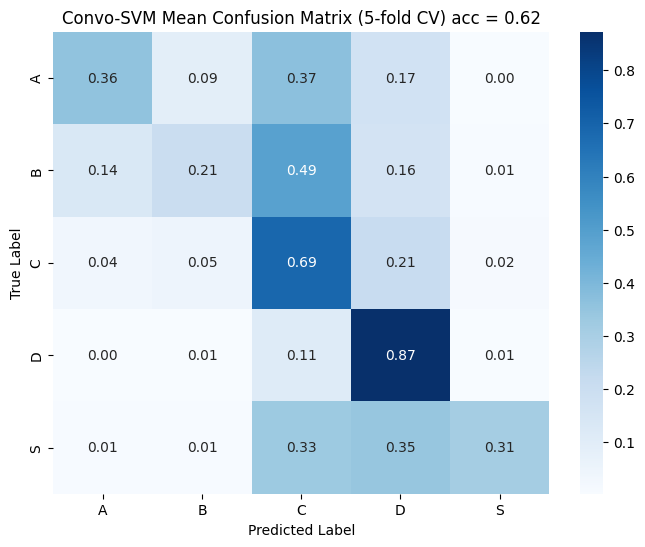

In [117]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Class names
class_names = ['A', 'B', 'C', 'D', 'S']

# Define k-folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize confusion matrix accumulator
conf_matrix_sum = np.zeros((len(class_names), len(class_names)))
accuracies = []
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Remove the final fully connected layer
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1]).to(device)
resnet_model.eval()  # Set to evaluation mode
# Loop over each fold
for fold, (train_idx, val_idx) in enumerate(kfold.split(pseudo_rgb_1, target)):
    print(f"Training fold {fold+1}...")
    
    # Split the data for the current fold
    X_train, X_val = image_array[train_idx], image_array[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Create datasets and loaders for this fold
    train_dataset = BuildingDataset(X_train, y_train, transform=transform)
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Function to extract features using ResNet
    def extract_features(model, loader):
        features_list = []
        labels_list = []
        
        with torch.no_grad():
            for images, labels in loader:
                images = images.to(device)
                # Forward pass through ResNet
                features = model(images)
                features = features.view(features.size(0), -1)  # Flatten
                features_list.append(features.cpu().numpy())
                labels_list.append(labels.cpu().numpy())
        
        return np.concatenate(features_list), np.concatenate(labels_list)

    # Extract features for the current fold
    train_features, train_labels = extract_features(resnet_model, train_loader)
    val_features, val_labels = extract_features(resnet_model, val_loader)
    print(train_features.shape)

    # Train SVM
    svm = SVC(kernel="rbf", gamma="auto", C=10.0, verbose=False)
    svm.fit(train_features, train_labels)

    # Predict on validation set
    val_preds = svm.predict(val_features)
    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f'Fold {fold+1} Validation Accuracy: {val_accuracy * 100:.2f}%')
    accuracies.append(val_accuracy)

    # Compute confusion matrix for this fold
    cm = confusion_matrix(val_labels, val_preds, labels=range(len(class_names)))
    
    # Add to the accumulated confusion matrix
    conf_matrix_sum += cm

# Compute the mean confusion matrix
mean_conf_matrix = conf_matrix_sum / kfold.get_n_splits()

# Normalize the confusion matrix
mean_conf_matrix_normalized = mean_conf_matrix.astype('float') / mean_conf_matrix.sum(axis=1)[:, np.newaxis]
mean_accuracy = np.mean(accuracies)
print(f'Mean Validation Accuracy: {mean_accuracy * 100:.2f}%')
# Plot the mean normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Convo-SVM Mean Confusion Matrix (5-fold CV) acc = {mean_accuracy:.2f}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Loading the trained ResNET models and making an ensemble, Plot Confusion Matrix

### Class definition and other supplementaries for model loading. (Just Run)

In [242]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from PIL import Image

# image_array = np.load('Image_array224x224_train.npy')
# image_labels = np.load('label_array224x224_train.npy')

class BuildingDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

    ### comment this part out for monochrome input
        image = image.astype(np.uint8)

    # Check if image is already in RGB format (3 channels), if not convert it to RGB
        # if len(image.shape) == 2:  # If grayscale, convert to 3-channel by stacking
        #     image = np.stack([image]*3, axis=-1)

        # Convert NumPy array to PIL image
        image = Image.fromarray(image)
    #################################################

        if self.transform:
            image = self.transform(image)
            
        return image, label



# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define CNN model (Transfer Learning with ResNet18)

class BuildingClassifierWithDropout(nn.Module):
    def __init__(self, num_classes=5, dropout_prob=0.5, unfreeze_layers=1,resnet_version=50):
        super(BuildingClassifierWithDropout, self).__init__()
        # Using pretrained ResNet101 for transfer learning
        if(resnet_version == 101):
            self.model = models.resnet101(weights=ResNet101_Weights.IMAGENET1K_V2)
        elif(resnet_version == 18):
            self.model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        elif(resnet_version == 34):
            self.model = models.resnet34(weights=ResNet34_Weights.DEFAULT)
        elif(resnet_version == 50):
            self.model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

        # Freeze all layers first
        for param in self.model.parameters():
            param.requires_grad = False

        # Option to unfreeze more layers
        if unfreeze_layers == 1:
            for param in self.model.fc.parameters():
                param.requires_grad = True
        elif unfreeze_layers == 2:
            for param in self.model.layer4.parameters():
                param.requires_grad = True
            for param in self.model.fc.parameters():
                param.requires_grad = True
        elif unfreeze_layers == 3:
            for param in self.model.layer3.parameters():
                param.requires_grad = True
            for param in self.model.layer4.parameters():
                param.requires_grad = True
            for param in self.model.fc.parameters():
                param.requires_grad = True
        else:
            for param in self.model.parameters():
                param.requires_grad = True

        # Dropout layers
        # self.dropout_conv = nn.Dropout(dropout_prob)  # Dropout for convolutional layers
        self.dropout_fc = nn.Dropout(dropout_prob)    # Dropout before the final fully connected layer
        
        # Modify the final fully connected layer
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
    def forward(self, x):
            # Pass through the ResNet18 feature extractor
            x = self.model(x)
            # Apply dropout before the final layer
            x = self.dropout_fc(x)
            return x


class BuildingClassifier(nn.Module):
    def __init__(self, num_classes=5, dropout_prob=0.5):
        super(BuildingClassifier, self).__init__()
        # Using pretrained ResNet18 for transfer learning
        self.model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)
        # Modify the final fully connected layer
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
    
    def forward(self, x):
        # Pass through the ResNet18 feature extractor
        x = self.model(x)
        # Apply dropout before the final layer
        x = self.dropout(x)
        return x

image_array = np.load('Image_array224x224.npy')
image_labels = np.load('label_array224x224.npy')
target = image_labels.astype(int)-1

# Ensure the BuildingDataset and transform have been defined previously
# Example BuildingDataset definition (for reference):
class BuildingDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        image = image.astype(np.uint8)  # Ensure the image is in uint8 format
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        
        return image, label

# Define function to create val_loader with customizable batch size
def create_val_loader(image_array, image_labels, batch_size, transform, test_size=0.2, random_state=42):
    # Convert labels if necessary (e.g., starting from 1 instead of 0)
    target = image_labels.astype(int) - 1
    
    # Split data into training and validation sets
    _, X_val, _, y_val = train_test_split(
        image_array, target, test_size=test_size, random_state=random_state, stratify=target
    )
    
    # Create validation dataset
    val_dataset = BuildingDataset(X_val, y_val, transform=transform)
    
    # Create validation loader with customizable batch size
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
    
    return val_loader

# Example usage:
# Assuming image_array, image_labels, and transform are already defined
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel RGB
    transforms.Resize((224, 224)), # Add random rotation + horizontal flipping
    # transforms.RandomHorizontalFlip(p=0.5),       # Add random horizontal flip
    # transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    # transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0))
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])



import torch
import numpy as np
from collections import Counter

# Function to load models and apply max voting ensemble
def max_voting_ensemble(model_names_list, val_loader, num_classes, device):
    all_model_preds = []

    # Iterate through each model in the model_names_list
    for model_name in model_names_list:
        print(f"Loading model: {model_name}")

        if('ResNET18' in model_name):
            resnet_version = 18
        elif('ResNET34' in model_name):
            resnet_version = 34
        elif('ResNET50' in model_name):
            resnet_version = 50
        elif('ResNET101' in model_name):
            resnet_version = 101

        # Load the saved model
        # model = BuildingClassifierWithDropout(num_classes=num_classes, dropout_prob=0.5, unfreeze_layers=2,resnet_version=resnet_version)  # Customize based on your model structure
        # model.load_state_dict(torch.load(model_name, map_location=device))
        model = torch.load(model_name, map_location=device)
        model = model.to(device)
        model.eval()  # Set model to evaluation mode

        # Collect predictions for this model
        model_preds = []
        with torch.no_grad():
            for images, _ in val_loader:  # We don't need the labels for prediction
                images = images.to(device)

                # Make predictions
                outputs = model(images)
                _, preds = torch.max(outputs, 1)

                # Append predictions to the model_preds list
                model_preds.extend(preds.cpu().numpy())

        all_model_preds.append(model_preds)

    # Transpose to get predictions for each sample across all models
    all_model_preds = np.array(all_model_preds).T  # Shape: [num_samples, num_models]

    # Max voting: Get the most common class for each sample
    final_predictions = []
    for sample_preds in all_model_preds:
        # Count the occurrence of each class
        most_common_class = Counter(sample_preds).most_common(1)[0][0]
        final_predictions.append(most_common_class)

    return np.array(final_predictions)

import torch
import numpy as np
import torch.nn.functional as F
from collections import Counter

# Function to load models and apply softmax-based ensemble
def softmax_ensemble(model_names_list, val_loader, num_classes, device):
    all_model_softmax = []

    # Iterate through each model in the model_names_list
    for model_name in model_names_list:
        print(f"Loading model: {model_name}")

        if 'ResNET18' in model_name:
            resnet_version = 18
        elif 'ResNET34' in model_name:
            resnet_version = 34
        elif 'ResNET50' in model_name:
            resnet_version = 50
        elif 'ResNET101' in model_name:
            resnet_version = 101

        # Load the saved model
        model = torch.load(model_name, map_location=device)
        model = model.to(device)
        model.eval()  # Set model to evaluation mode

        # Collect softmax probabilities for this model
        model_softmax = []
        with torch.no_grad():
            for images, _ in val_loader:  # We don't need the labels for prediction
                images = images.to(device)

                # Make predictions
                outputs = model(images)

                # Apply softmax to get probabilities
                softmax_outputs = F.softmax(outputs, dim=1)

                # Append softmax probabilities to the model_softmax list
                model_softmax.append(softmax_outputs.cpu().numpy())

        all_model_softmax.append(np.concatenate(model_softmax, axis=0))  # Shape: [num_samples, num_classes]

    # Stack the softmax outputs from all models: Shape [num_models, num_samples, num_classes]
    all_model_softmax = np.array(all_model_softmax)

    # Take the mean softmax output across all models: Shape [num_samples, num_classes]
    mean_softmax = np.mean(all_model_softmax, axis=0)

    # Choose the class with the highest averaged probability
    final_predictions = np.argmax(mean_softmax, axis=1)

    return final_predictions


### Load model, make ensemble and get prediction.

Loading model: FULL_Pytorch_ep100_batch64_lr0.0001_drop0.4_lr0.0001_sub_5.pth


/tmp/ipykernel_3730076/2372200868.py:197: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


Loading model: Pytorch_Invest_SMOTE_ResNET50_schedulerTrue_val63.29365079365079%_ep50_checkpoint_0.6_batch64.pth
Loading model: Pytorch_Multiple_layers_ResNET50_schedulerTrue_val64.88095238095238%_ep170_checkpoint_0.4_unfrozen4_batch64.pth
Loading model: Pytorch_Multiple_layers_ResNET50_schedulerTrue_val65.47619047619048%_ep130_checkpoint_0.4_unfrozen3_batch64.pth
Loading model: FULL_Pytorch_cleaned_ResNET50_schedulerTrue_ep260_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth
Loading model: FULL_Pytorch_FineTune_Train_ResNET50_schedulerTrue_SMOTEFalse_optimadam_ep150_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth
Accuracy: 71.43%


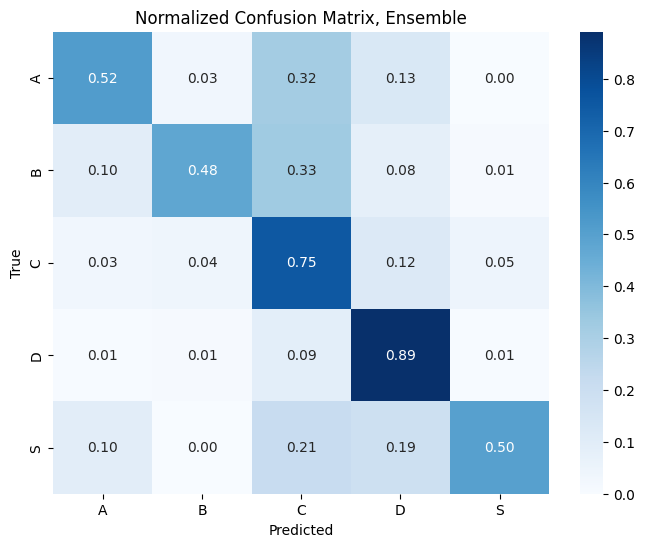

In [244]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['A', 'B', 'C', 'D', 'S']

Model_names_19=['FULL_Pytorch_ep100_batch64_lr0.0001_drop0.4_lr0.0001_sub_5.pth','Pytorch_Invest_SMOTE_ResNET50_schedulerTrue_val63.29365079365079%_ep50_checkpoint_0.6_batch64.pth', 
'Pytorch_Multiple_layers_ResNET50_schedulerTrue_val64.88095238095238%_ep170_checkpoint_0.4_unfrozen4_batch64.pth', 
'Pytorch_Multiple_layers_ResNET50_schedulerTrue_val65.47619047619048%_ep130_checkpoint_0.4_unfrozen3_batch64.pth', 
'FULL_Pytorch_cleaned_ResNET50_schedulerTrue_ep260_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth', 
'FULL_Pytorch_FineTune_Train_ResNET50_schedulerTrue_SMOTEFalse_optimadam_ep150_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth']
# plot_combined_normalized_confusion_matrix_4([model1,model3,model4, model5,model6,model7,model7], val_loader, class_names, device)

image_array_1 = np.load('Image_array224x224_train.npy')
image_labels = np.load('label_array224x224_train.npy')
target_1 = image_labels.astype(int)-1
val_loader = create_val_loader(image_array_1, target_1, batch_size=64, transform=transform)
# Step 1: Get the predictions from the ensemble (assuming you've already obtained `resnet_preds_64` from the ensemble)
resnet_preds_64 = max_voting_ensemble(Model_names_19, val_loader, 5, device=device)

# Step 2: Retrieve the ground truth labels from the validation dataset
y_true = []
for _, labels in val_loader:
    y_true.extend(labels.cpu().numpy()+1)


# Step 3: Calculate the accuracy
accuracy = accuracy_score(y_true, resnet_preds_64)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 4: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, resnet_preds_64)

# Step 5: Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Step 6: Visualize the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f'Normalized Confusion Matrix, Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# What is SMOTE doing to images?

In [182]:
from imblearn.over_sampling import SMOTE

# Load the arrays from memory
image_array = np.load('Image_array224x224.npy')
image_labels = np.load('label_array224x224.npy')

# image_array = np.load('Image_array224x224_compressed.npz')['arr_0'].astype(np.uint8)
# image_labels = np.load('label_array.npy')
target = image_labels.astype(int)-1

X_train, X_val, y_train, y_val = train_test_split(image_array, target, 
                                                        train_size=0.8, stratify=target,
                                                        random_state=42) 

            # Convert the images to 1D vectors for SMOTE


X = X_train.reshape((X_train.shape[0], -1))  # Flattening image to (n_samples, n_features)
y = y_train  # Class labels

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balances all classes equally
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reshape the oversampled data back to image format (H, W) if needed
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_train.shape[1], X_train.shape[2]))



4


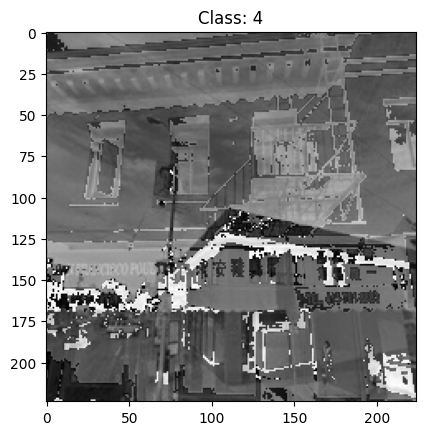

In [238]:
num = 3000
print(y_resampled[num])
plt.imshow(X_resampled[num,:,:].astype('uint8'), cmap='gray')
plt.title(f'Class: {y_resampled[num]}')
plt.show()

# Submission Pipeline

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import torch
import numpy as np
import torch.nn.functional as F
from collections import Counter
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import torch
import numpy as np
from collections import Counter


# Path to Test_Data
path_test = 'Test_Data'

Submission_filename = 'Submission_19_test_1.csv'

######################### This Part is for the pretrained models to load ##################

class BuildingDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

    ### comment this part out for monochrome input
        image = image.astype(np.uint8)

        # Convert NumPy array to PIL image
        image = Image.fromarray(image)
    #################################################

        if self.transform:
            image = self.transform(image)
            
        return image, label



# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define CNN model (Transfer Learning with ResNet18)

class BuildingClassifierWithDropout(nn.Module):
    def __init__(self, num_classes=5, dropout_prob=0.5, unfreeze_layers=1,resnet_version=50):
        super(BuildingClassifierWithDropout, self).__init__()
        # Using pretrained ResNet101 for transfer learning
        if(resnet_version == 101):
            self.model = models.resnet101(weights=ResNet101_Weights.IMAGENET1K_V2)
        elif(resnet_version == 18):
            self.model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        elif(resnet_version == 34):
            self.model = models.resnet34(weights=ResNet34_Weights.DEFAULT)
        elif(resnet_version == 50):
            self.model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

        # Freeze all layers first
        for param in self.model.parameters():
            param.requires_grad = False

        # Option to unfreeze more layers
        if unfreeze_layers == 1:
            for param in self.model.fc.parameters():
                param.requires_grad = True
        elif unfreeze_layers == 2:
            for param in self.model.layer4.parameters():
                param.requires_grad = True
            for param in self.model.fc.parameters():
                param.requires_grad = True
        elif unfreeze_layers == 3:
            for param in self.model.layer3.parameters():
                param.requires_grad = True
            for param in self.model.layer4.parameters():
                param.requires_grad = True
            for param in self.model.fc.parameters():
                param.requires_grad = True
        else:
            for param in self.model.parameters():
                param.requires_grad = True

        # Dropout layers
        # self.dropout_conv = nn.Dropout(dropout_prob)  # Dropout for convolutional layers
        self.dropout_fc = nn.Dropout(dropout_prob)    # Dropout before the final fully connected layer
        
        # Modify the final fully connected layer
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
    def forward(self, x):
            # Pass through the ResNet18 feature extractor
            x = self.model(x)
            # Apply dropout before the final layer
            x = self.dropout_fc(x)
            return x


class BuildingClassifier(nn.Module):
    def __init__(self, num_classes=5, dropout_prob=0.5):
        super(BuildingClassifier, self).__init__()
        # Using pretrained ResNet18 for transfer learning
        self.model = models.resnet18(weights=ResNet18_Weights.DEFAULT)
        # Dropout layer
        self.dropout = nn.Dropout(dropout_prob)
        # Modify the final fully connected layer
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)
    
    def forward(self, x):
        # Pass through the ResNet18 feature extractor
        x = self.model(x)
        # Apply dropout before the final layer
        x = self.dropout(x)
        return x
    

# Function to load models and apply max voting ensemble
def max_voting_ensemble(model_names_list, val_loader, num_classes, device):
    all_model_preds = []

    # Iterate through each model in the model_names_list
    for model_name in model_names_list:
        print(f"Loading model: {model_name}")

        if('ResNET18' in model_name):
            resnet_version = 18
        elif('ResNET34' in model_name):
            resnet_version = 34
        elif('ResNET50' in model_name):
            resnet_version = 50
        elif('ResNET101' in model_name):
            resnet_version = 101

        # Load the saved model
        # model = BuildingClassifierWithDropout(num_classes=num_classes, dropout_prob=0.5, unfreeze_layers=2,resnet_version=resnet_version)  # Customize based on your model structure
        # model.load_state_dict(torch.load(model_name, map_location=device))
        model = torch.load(model_name, map_location=device)
        model = model.to(device)
        model.eval()  # Set model to evaluation mode

        # Collect predictions for this model
        model_preds = []
        with torch.no_grad():
            for images, _ in val_loader:  # We don't need the labels for prediction
                images = images.to(device)

                # Make predictions
                outputs = model(images)
                _, preds = torch.max(outputs, 1)

                # Append predictions to the model_preds list
                model_preds.extend(preds.cpu().numpy())

        all_model_preds.append(model_preds)

    # Transpose to get predictions for each sample across all models
    all_model_preds = np.array(all_model_preds).T  # Shape: [num_samples, num_models]

    # Max voting: Get the most common class for each sample
    final_predictions = []
    for sample_preds in all_model_preds:
        # Count the occurrence of each class
        most_common_class = Counter(sample_preds).most_common(1)[0][0]
        final_predictions.append(most_common_class)

    return np.array(final_predictions)




# Function to load models and apply softmax-based ensemble
def softmax_ensemble(model_names_list, val_loader, num_classes, device):
    all_model_softmax = []

    # Iterate through each model in the model_names_list
    for model_name in model_names_list:
        print(f"Loading model: {model_name}")

        if 'ResNET18' in model_name:
            resnet_version = 18
        elif 'ResNET34' in model_name:
            resnet_version = 34
        elif 'ResNET50' in model_name:
            resnet_version = 50
        elif 'ResNET101' in model_name:
            resnet_version = 101

        # Load the saved model
        model = torch.load(model_name, map_location=device)
        model = model.to(device)
        model.eval()  # Set model to evaluation mode

        # Collect softmax probabilities for this model
        model_softmax = []
        with torch.no_grad():
            for images, _ in val_loader:  # We don't need the labels for prediction
                images = images.to(device)

                # Make predictions
                outputs = model(images)

                # Apply softmax to get probabilities
                softmax_outputs = F.softmax(outputs, dim=1)

                # Append softmax probabilities to the model_softmax list
                model_softmax.append(softmax_outputs.cpu().numpy())

        all_model_softmax.append(np.concatenate(model_softmax, axis=0))  # Shape: [num_samples, num_classes]

    # Stack the softmax outputs from all models: Shape [num_models, num_samples, num_classes]
    all_model_softmax = np.array(all_model_softmax)

    # Take the mean softmax output across all models: Shape [num_samples, num_classes]
    mean_softmax = np.mean(all_model_softmax, axis=0)

    # Choose the class with the highest averaged probability
    final_predictions = np.argmax(mean_softmax, axis=1)

    return final_predictions

################################################################################


filenames_ = [filen for filen in os.listdir(f"{path_test}/") if 'jpg' in filen]
print(len(filenames_))

filenames = [f'{i+1}.jpg' for i in range(len(filenames_))]
print(filenames)



def store_img_return_arr(filenames_list,path_to):
    store_names = np.zeros((len(filenames_list),224,224)) # num_of_files x 224 x 224, initialization
    
    for i in range(len(filenames_list)): # Loop through all files in that folder--> store as np array
        store_names[i,:,:] = np.asarray((Image.open(f'{path_to}/{filenames_list[i]}')).resize((224, 224)))
    return store_names

store_test = store_img_return_arr(filenames, path_test)




# Assume store_test has shape (num_of_images, 224, 224)
# Convert store_test array to a 3-channel format using transformations in DataLoader

class StoreTestDataset(Dataset):
    def __init__(self, store_test, transform=None):
        self.store_test = store_test
        self.transform = transform
        self.dummy_label = -1  # Dummy label for test data (as you don't have actual labels)

    def __len__(self):
        return len(self.store_test)

    def __getitem__(self, idx):
        # Extract the single-channel image and convert it to PIL Image
        img = Image.fromarray(self.store_test[idx].astype(np.uint8))  # Convert to PIL Image for transforms
        
        # Apply transformations (Grayscale to RGB and other transforms)
        if self.transform:
            img = self.transform(img)
        
        return img, self.dummy_label  # Return both the image and the dummy label

# Define the same transform you used for the validation set
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel RGB for the model
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizing same as ImageNet
])

# Create the test dataset from the store_test array
test_dataset = StoreTestDataset(store_test, transform=transform_test)

# Create the DataLoader for test images (with dummy labels)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Checking the size of the dataset and test_loader
print(f"Test dataset length: {len(test_dataset)}")
print(f"Test loader length: {len(test_loader)} batches")



Model_names_19 = ['FULL_Pytorch_ep100_batch64_lr0.0001_drop0.4_lr0.0001_sub_5.pth',
'Pytorch_Invest_SMOTE_ResNET50_schedulerTrue_val63.29365079365079%_ep50_checkpoint_0.6_batch64.pth', 
'Pytorch_Multiple_layers_ResNET50_schedulerTrue_val64.88095238095238%_ep170_checkpoint_0.4_unfrozen4_batch64.pth', 
'Pytorch_Multiple_layers_ResNET50_schedulerTrue_val65.47619047619048%_ep130_checkpoint_0.4_unfrozen3_batch64.pth', 
'FULL_Pytorch_cleaned_ResNET50_schedulerTrue_ep260_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth', 
'FULL_Pytorch_FineTune_kang_Train_ResNET50_schedulerTrue_SMOTEFalse_optimadam_ep150_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth']

resnet_preds = max_voting_ensemble(model_names_list=Model_names_19,val_loader=test_loader,num_classes=5,device=device)

resnet_preds_test = np.array(resnet_preds)+1

d = {'ID': np.array([i+1 for i in range(len(filenames))]), 'Predictions': resnet_preds_test}
df = pd.DataFrame(data=d)

df.to_csv(f'{Submission_filename}',index=False)

478
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '10

/tmp/ipykernel_3730076/3470397865.py:157: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_name, map_location=device)


Loading model: Pytorch_Invest_SMOTE_ResNET50_schedulerTrue_val63.29365079365079%_ep50_checkpoint_0.6_batch64.pth
Loading model: Pytorch_Multiple_layers_ResNET50_schedulerTrue_val64.88095238095238%_ep170_checkpoint_0.4_unfrozen4_batch64.pth
Loading model: Pytorch_Multiple_layers_ResNET50_schedulerTrue_val65.47619047619048%_ep130_checkpoint_0.4_unfrozen3_batch64.pth
Loading model: FULL_Pytorch_cleaned_ResNET50_schedulerTrue_ep260_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth
Loading model: FULL_Pytorch_FineTune_kang_Train_ResNET50_schedulerTrue_SMOTEFalse_optimadam_ep150_batch64_lr0.0001_drop0.5_unfrozen1_lr0.0001.pth
